# About the Datasets

**This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.**

* sex: female or male
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: hospitalized or not hospitalized.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* death: indicates whether the patient died or recovered.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.filterwarnings("ignore")

## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Dataset Overview

In [2]:
df = pd.read_csv('./Covid Data.csv.zip', compression='zip')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


#### Definition of some column

* USMER: level of medical units(refer to complexity of medical cases.)
* MEDICAL_UNIT : type of institution which provide care.
* PATIENT_TYPE: hospatilized or not 1 for who returned to home
* INTUBED: If connected to ventilator.
* INMSUPR: immunosuppressed or not. ##### #1 is ture 2 is false

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
# Checking for missing values
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [5]:
# No of unique values by columns
for i in df.columns:
    print(f'{i}: {len(df[i].unique())}')

USMER: 2
MEDICAL_UNIT: 13
SEX: 2
PATIENT_TYPE: 2
DATE_DIED: 401
INTUBED: 4
PNEUMONIA: 3
AGE: 121
PREGNANT: 4
DIABETES: 3
COPD: 3
ASTHMA: 3
INMSUPR: 3
HIPERTENSION: 3
OTHER_DISEASE: 3
CARDIOVASCULAR: 3
OBESITY: 3
RENAL_CHRONIC: 3
TOBACCO: 3
CLASIFFICATION_FINAL: 7
ICU: 4


In [6]:
df['DATE_DIED'].value_counts().head()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
Name: DATE_DIED, dtype: int64

In [7]:
df['PNEUMONIA'].value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

### INFERENCE:
1. We have some features that we expect them to have just 2 unique values but we see that these features have 3 or 4 unique values. For example the feature "PNEUMONIA" has 3 unique values (1,2,99) 99 represents NaN values. Hence we will just take the rows that includes 1 and 2 values. ####
2. In "DATE_DIED" column, we have 971633 "9999-99-99" values which represent **alive patients** so i will take this feature and create a new column called "DEATH" that includes whether the patient died or not.

## Data Preprocessing

In [8]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [9]:
# If we have "9999-99-99" values that means this patient is alive.
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

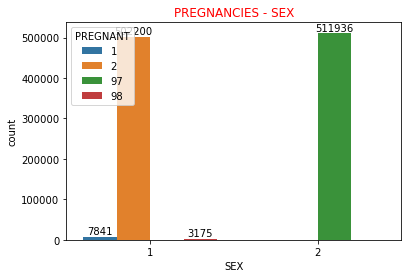

In [10]:
# Pregnant-sex bar plot
plt.figure()
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="red");

We see that all "97" values are for males and males can not be pregnant so we will convert 97 to 2.

In [11]:
# Converting process according to inference above
df.PREGNANT = df.PREGNANT.replace(97,2)

# Getting rid of the missing values
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

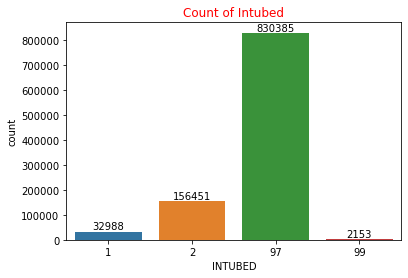

In [12]:
# Missing value analysis of "INTUBED" feature
ax = sns.countplot(df.INTUBED)
plt.bar_label(ax.containers[0])
plt.title("Count of Intubed",color="red");

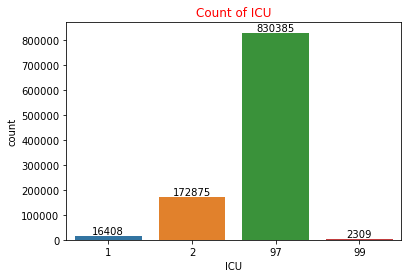

In [13]:
# Missing value analysis of "ICU" feature
ax = sns.countplot(df.ICU)
plt.bar_label(ax.containers[0])
plt.title("Count of ICU",color="red");

### Dropping the columns

* In "INTUBED" and "ICU" features there are too many missing values so i will drop them. Also we don't need "DATE_DIED" column anymore because we used this feature as a "DEATH" feature.

In [23]:
df.drop(columns=["INTUBED","ICU"], inplace=True)

In [24]:
# Checking for the new unique values of each column
for i in df.columns:
    print(f'{i}: {len(df[i].unique())}')

USMER: 2
MEDICAL_UNIT: 13
SEX: 2
PATIENT_TYPE: 2
DATE_DIED: 395
PNEUMONIA: 2
AGE: 121
PREGNANT: 2
DIABETES: 2
COPD: 2
ASTHMA: 2
INMSUPR: 2
HIPERTENSION: 2
OTHER_DISEASE: 2
CARDIOVASCULAR: 2
OBESITY: 2
RENAL_CHRONIC: 2
TOBACCO: 2
CLASIFFICATION_FINAL: 7
DEATH: 2


## Exploratory Data Analysis

### Age

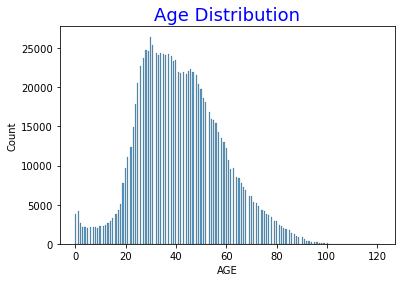

In [16]:
sns.histplot(x=df.AGE)
plt.title("Age Distribution", color="Blue", fontsize=18);

* Patients are roughly between 20-60 years old.

### Year & Month of dead patient

In [25]:
df["MONTH"] = df.DATE_DIED.str.split("/", expand = True)[1]
df["YEAR"] = df.DATE_DIED.str.split("/", expand = True)[2]

In [27]:
df.YEAR.value_counts()

2020    74345
2021      312
Name: YEAR, dtype: int64

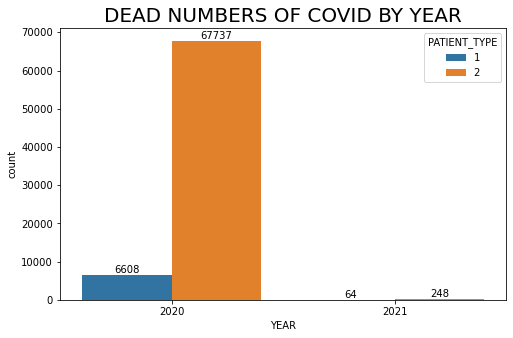

In [28]:
# 1 for returned home and 2 for hospitalization.
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "YEAR", hue = "PATIENT_TYPE", data = df)
plt.title("DEAD NUMBERS OF COVID BY YEAR", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

**In 2020**,

* Around 68000 people died from covid and not hospitalized
* Around 6600 people died from covid and hospitalized

**In 2021**,

* Around 60 people died from covid and not hospitalized
* Around 250 people died from covid and hospitalized.

In [29]:
df.drop(["DATE_DIED", "MONTH", "YEAR"], axis = 1, inplace = True)

### Sex & Death

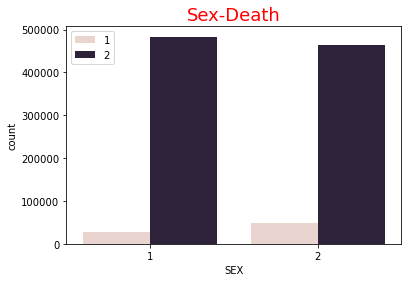

In [32]:
# 1 - female. 2 - male
sns.countplot(df.SEX,hue=df.DEATH, palette=sns.cubehelix_palette(2))
plt.title("Sex-Death",fontsize=18, color="red")
plt.legend(loc="best");

* Males are more likely to die of covid compare to females.

### Obesity

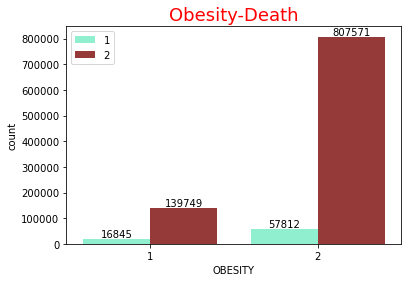

In [33]:
ax=sns.countplot(df.OBESITY,hue=df.DEATH, palette=sns.color_palette(["#7fffd4","#a52a2a"]))
plt.title("Obesity-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best");

* Obese patients are more likely to die from covid compare to non-obese patients.

### Age & Death

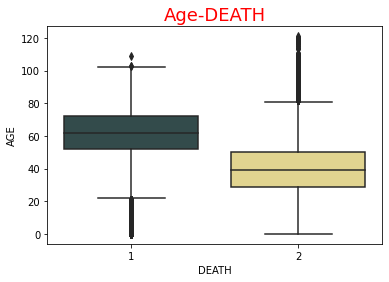

In [34]:
sns.boxplot(x="DEATH", y="AGE",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-DEATH",fontsize=18, color="red");

* The older patients are more likely to die compare to younger ones.

### Death Distribution

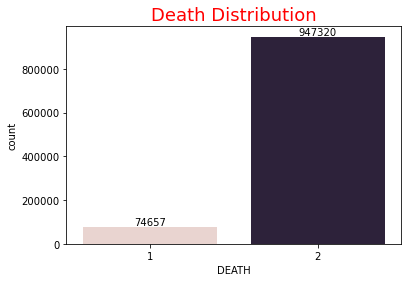

In [35]:
ax = sns.countplot(df.DEATH, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");

* The values are distributed unbalanced in target column. This will probably cause an imbalance problem

### Correlation

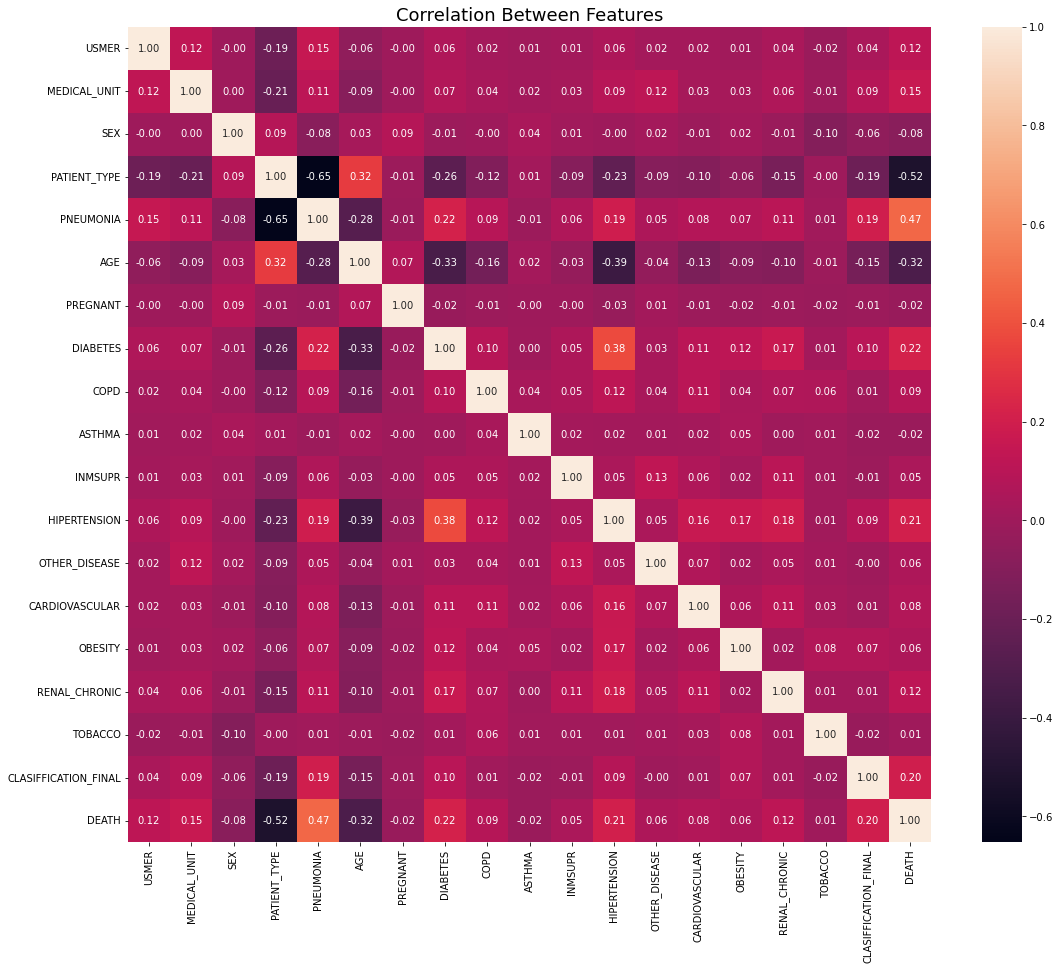

In [36]:
corr = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18);

In [37]:
df['MEDICAL_UNIT'].value_counts()

12    589209
4     306967
6      37791
9      37142
3      18646
8      10091
10      7538
5       7049
11      5553
7        870
13       811
2        159
1        151
Name: MEDICAL_UNIT, dtype: int64